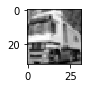

In [22]:
from PIL import Image
import numpy as np
img = np.array(Image.open('truck.png'))

rgb_weights = [0.2125 , 0.5870, 0.1140]
img = np.dot(img, rgb_weights)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(1, 1))
ax.imshow(img, interpolation='nearest',cmap=plt.get_cmap("gray"))

In [23]:
def convolveimage(image, kernel):

    output = np.zeros_like(image)

    image_padded = np.zeros((image.shape[0] + 4, image.shape[1] + 4))
    image_padded[2:-2, 2:-2] = image
    
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y, x] = (kernel * image_padded[y: y+5, x: x+5]).sum()

    return output

In [24]:
def relufunction(image):
    return np.maximum(0,image)

In [25]:
from numpy.lib.stride_tricks import as_strided

def maxpooling(image, kernel_size, stride):

    output_shape = ((image.shape[0] - kernel_size)//stride + 1,
                    (image.shape[1] - kernel_size)//stride + 1)
    
    kernel_size = (kernel_size, kernel_size)
    image_w = as_strided(image, shape = output_shape + kernel_size, 
                        strides = (stride*image.strides[0],
                                   stride*image.strides[1]) + image.strides)
    
    image_w = image_w.reshape(-1, *kernel_size)

    return image_w.max(axis=(1,2)).reshape(output_shape)

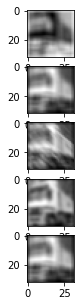

In [26]:
import matplotlib.pyplot as plt

filter_matrix = []
filter_matrix.append(np.array([[-1,-1, -1, -1, -1], [-1,-1, -1, -1, -1], [-1,-1, -1, -1, -1], [-1,-1, -1, -1, -1], 
                               [-1,-1, -1, -1, -1]]))
filter_matrix.append(np.array([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]))
filter_matrix.append(np.array([[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]))
filter_matrix.append(np.array([[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                               [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                               [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                               [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                               [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]]))
filter_matrix.append(np.array([[1/9, 1/9, 1/9, 1/9, 1/9], [1/9, 1/9, 1/9, 1/9, 1/9], [1/9, 1/9, 1/9, 1/9, 1/9], 
                               [1/9, 1/9, 1/9, 1/9, 1/9], [1/9, 1/9, 1/9, 1/9, 1/9]]))

conv1 = []
for i in range (len(filter_matrix)):
    conv1.append(convolveimage(img,filter_matrix[i]))


f, ax = plt.subplots(5,figsize=(5, 5))
for i in range (len(filter_matrix)):
    ax[i].imshow(conv1[i], cmap=plt.get_cmap("gray"))

plt.show()


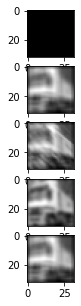

In [27]:
relu1 = []
for i in range (len(filter_matrix)):
    relu1.append(relufunction(conv1[i]))

f, ax = plt.subplots(5,figsize=(5, 5))
for i in range (len(filter_matrix)):
    ax[i].imshow(relu1[i], cmap=plt.get_cmap("gray"))

plt.show()

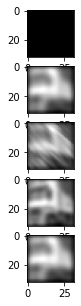

In [28]:
conv2 = []
for i in range (len(filter_matrix)):
    conv2.append(convolveimage(relu1[i],filter_matrix[i]))
    
f, ax = plt.subplots(5,figsize=(5, 5))
for i in range (len(filter_matrix)):
    ax[i].imshow(conv2[i], cmap=plt.get_cmap("gray"))

plt.show()

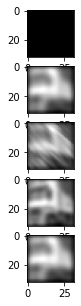

In [29]:
relu2 = []
for i in range (len(filter_matrix)):
    relu2.append(relufunction(conv2[i]))

f, ax = plt.subplots(5,figsize=(5, 5))
for i in range (len(filter_matrix)):
    ax[i].imshow(relu2[i], cmap=plt.get_cmap("gray"))

plt.show()

Shape after max pool: (16, 16)


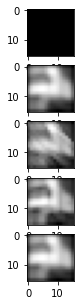

In [30]:
maxpool1 = []
for i in range (len(filter_matrix)):
    maxpool1.append(maxpooling(relu2[i], kernel_size=2, stride=2))

print("Shape after max pool:",maxpool1[1].shape)
f, ax = plt.subplots(5,figsize=(5, 5))
for i in range (len(filter_matrix)):
    ax[i].imshow(maxpool1[i], cmap=plt.get_cmap("gray"))

plt.show()

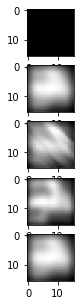

In [31]:
conv3 = []
for i in range (len(filter_matrix)):
    conv3.append(convolveimage(maxpool1[i],filter_matrix[i]))
    
f, ax = plt.subplots(5,figsize=(5, 5))
for i in range (len(filter_matrix)):
    ax[i].imshow(conv3[i], cmap=plt.get_cmap("gray"))

plt.show()

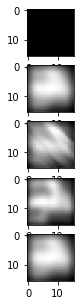

In [32]:
relu3 = []
for i in range (len(filter_matrix)):
    relu3.append(relufunction(conv3[i]))

f, ax = plt.subplots(5,figsize=(5, 5))
for i in range (len(filter_matrix)):
    ax[i].imshow(relu3[i], cmap=plt.get_cmap("gray"))

plt.show()

Shape after max pool: (8, 8)


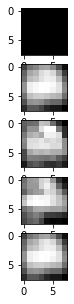

In [34]:
maxpool2 = []
for i in range (len(filter_matrix)):
    maxpool2.append(maxpooling(relu3[i], kernel_size=2, stride=2))

print("Shape after max pool:",maxpool2[1].shape)
f, ax = plt.subplots(5,figsize=(5, 5))
for i in range (len(filter_matrix)):
    ax[i].imshow(maxpool2[i], cmap=plt.get_cmap("gray"))

plt.show()